# **A STANDARD JUPYTERLAB SCRIPT**

#### by Ganquan Mao

# <span style="color:blue"> *Setups* </span>

In [129]:
### automatically refresh the buffer

%load_ext autoreload
%autoreload 2

### solve the auto-complete issue

%config Completer.use_jedi = False

### lvl 1 setups

import sys
sys.path.append('/portal1/dell/GitHub/WAYS')
sys.path.append('/portal1/dell/GitHub/sanctuary')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

### lvl 2 setups (systerm)

import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib as mpl
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
import os
import glob
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from stats import cr
from gistool import basemap, stack_image, stack_shp, stack_hatch, stack_shp_cn, ncslice
from spatial import upscale
import statsmodels.formula.api as smf
from scipy.stats.mstats import theilslopes
from scipy.stats import kendalltau
import cartopy.crs as ccrs

In [131]:
### matplotlib setups
## set the line width of the hatch
mpl.rcParams['hatch.linewidth'] = 0.5

In [ ]:
#LMRB shapefile path
file_shp = '/portal3/gis/Mekong_Delta/LANCANG_MEKONG.shp'

In [ ]:
#Read data what you want
ds_bw = xr.open_dataset('ERA5_prec_daily_/2019_prec_daily1.nc')

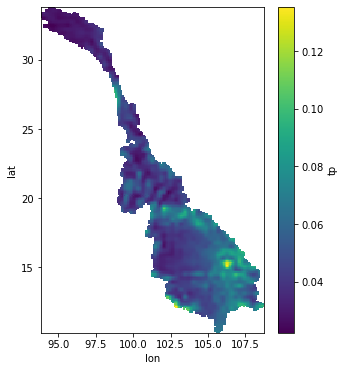

In [143]:

#slice shpfile and save as ds_bw_mk
ds_bw_mk,_ = ncslice(ds_bw,file_shp,0, index='ID')
ds_bw_mk.mean(dim='time').tp.plot()
# plot size
plt.rcParams["figure.figsize"] = (5,6)

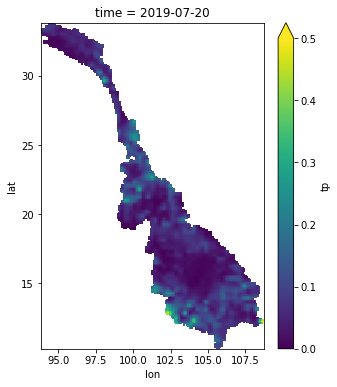

In [154]:
#plot specific date or lat or lon
ds_bw_mk.tp.sel(time=ds_bw_mk.time[200]).plot(vmin=0,vmax=0.5)

In [ ]:
#convert hourly data to daily data
ds_daily = ds_hourly.resample(time='D').sum(skipna=False)

In [ ]:
#merge dataser
ds_merge=xr.merge([ds1,ds2,ds3])

In [ ]:
#let specific value to Nan (data is a array)
data=np.where(ds_daily.tp.values<1000,ds_daily.tp.values,np.nan)

In [ ]:
# compose dataset
ds = xr.Dataset({'tp': (['time', 'lat', 'lon'], data)},
                    coords={'lon': (['lon'], ds_daily.longitude),
                            'lat': (['lat'], ds_daily.latitude),
                            'time': (['time'], ds_daily.time)})

In [ ]:
#save composed NetCDF file
ds.to_netcdf('path.nc')